#  ANN Using Keras (fashion_mnist) dataset


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import ttest

C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
#install Tenserflow and Keras

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
keras.__version__

'2.4.0'

In [5]:
tf.__version__

'2.3.0'

#### Uploading DataSet (fashion_mnist)

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
fashion_mnist

<module 'tensorflow.keras.datasets.fashion_mnist' from 'C:\\Users\\Admin\\anaconda3\\lib\\site-packages\\tensorflow\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [7]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

#### Accessing images present in dataset.

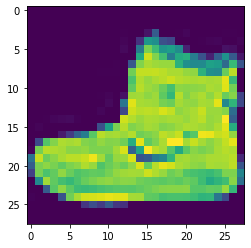

In [8]:
plt.imshow(X_train_full[0])

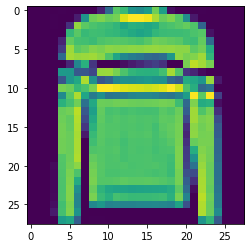

In [9]:
plt.imshow(X_train_full[5])

In [10]:
y_train_full[1]

0

#### creating list of all category in order of there labels

In [11]:
classnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

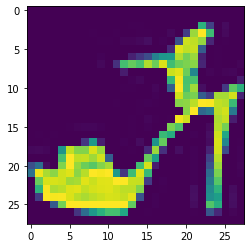

In [12]:
plt.imshow(X_train_full[9])

In [13]:
classnames[y_train_full[9]]

'Sandal'

In [14]:
X_train_full[10]

array([[  0,   0,   0,   0,   0,   0,   0,  11, 142, 200, 106,   0,   0,
          0,   0,   0,   0,   0,  85, 185, 112,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 152, 214, 217, 194, 236, 216, 187,
        149, 135, 153, 211, 217, 231, 205, 217, 188,  34,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  66, 185, 166, 180, 181, 190, 211, 221,
        197, 146, 198, 206, 191, 168, 190, 172, 188, 175,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 135, 153, 160, 175, 180, 170, 186, 187,
        190, 188, 190, 187, 174, 195, 185, 174, 161, 175,  59,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 161, 147, 160, 170, 178, 177, 180, 168,
        173, 174, 171, 185, 184, 185, 172, 171, 164, 174, 120,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   2, 175, 146, 145, 168, 178, 181, 185, 180,
        184, 178, 179, 187, 191, 193, 190, 181, 171, 172, 158,   0,   0,
          0,   0],
       [  

### Data Normalization

#### We then normalize the data dimension so that they are of approximately the same circle

In [15]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

#### Spliting data into train/validation/test dataset

In [16]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

In [17]:
X_valid[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

### Createing the model architecture

In [18]:
np.random.seed(42)
tf.random.set_seed(42)
# randomseed is used to replicate the same result every time.

### Creating Neural Network

#### Multi Level Perceptron Model

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(100,activation="softmax"))


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
Total params: 275,700
Trainable params: 275,700
Non-trainable params: 0
_________________________________________________________________


### Structure of Neural Network

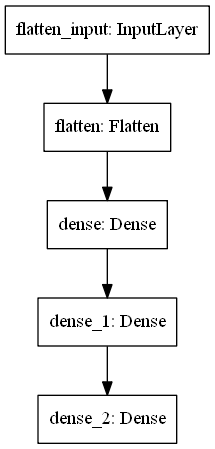

In [21]:
import pydot
keras.utils.plot_model(model)

### We can access parameter by using get_weight() method

In [22]:
weights, biases = model.layers[1].get_weights()

In [23]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [24]:
weights.shape

(784, 300)

In [25]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [26]:
biases.shape

(300,)

### Compiling model

In [27]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [28]:
model_history =model.fit(X_train, y_train, epochs=30,
                         validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8531 - accuracy: 0.7244 - val_loss: 0.5797 - val_accuracy: 0.8026
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5234 - accuracy: 0.8165 - val_loss: 0.4634 - val_accuracy: 0.8410
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4697 - accuracy: 0.8355 - val_loss: 0.6313 - val_accuracy: 0.7706
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4404 - accuracy: 0.8472 - val_loss: 0.4156 - val_accuracy: 0.8600
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4201 - accuracy: 0.8529 - val_loss: 0.3972 - val_accuracy: 0.8664
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4001 - accuracy: 0.8603 - val_loss: 0.3920 - val_accuracy: 0.8686
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3873 - accuracy: 0.8644 - val_loss: 0.3822 - val_accuracy:

In [29]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

### History shows all the loss,accuracy,validation loss and validation accuracy in the form of dictionary

In [30]:
model_history.history

{'loss': [0.8531190156936646,
  0.5233953595161438,
  0.4696652591228485,
  0.4403863251209259,
  0.4201187491416931,
  0.4001173675060272,
  0.3872554302215576,
  0.37460312247276306,
  0.3638780415058136,
  0.35368242859840393,
  0.3445810079574585,
  0.3348831534385681,
  0.32727038860321045,
  0.3208506405353546,
  0.3122742474079132,
  0.3066197335720062,
  0.3009159564971924,
  0.2943173050880432,
  0.28906795382499695,
  0.2835961878299713,
  0.27812400460243225,
  0.2729659378528595,
  0.2689679265022278,
  0.2641240358352661,
  0.25960755348205566,
  0.25475966930389404,
  0.25116753578186035,
  0.2473684549331665,
  0.2424253523349762,
  0.2386065274477005],
 'accuracy': [0.7243818044662476,
  0.8165454268455505,
  0.8355454802513123,
  0.8472181558609009,
  0.8529090881347656,
  0.8602545261383057,
  0.8643817901611328,
  0.8678363561630249,
  0.8727818131446838,
  0.8746545314788818,
  0.8781636357307434,
  0.8805999755859375,
  0.8829272985458374,
  0.8856545686721802,
  0

### Visualizing accuracy scores

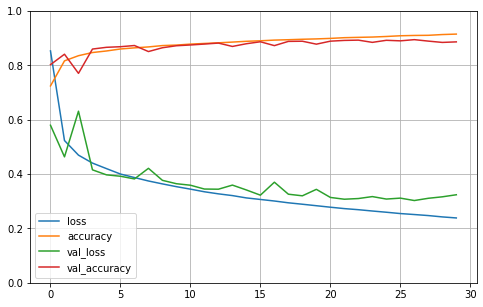

In [31]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

###   As we can see with each epoch the training accuracy and the validation accuracy is increasing and loss             is decreasing.
### We can also see that the model has not converged yet, the validation accuracy is still going up and validation loss is still going down.
### Therefore we should run with more epoch.

In [32]:
# using evaluate method to check accuracy score
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3552 - accuracy: 0.8761


[0.35515156388282776, 0.8761000037193298]

### We are getting 87% accuracy, which is preety good.

In [33]:
X_new = X_test[:3]

In [34]:
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96, 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0. 

In [35]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [36]:
np.array(classnames)[y_pred]

array(['Ankel boot', 'Pullover', 'Trouser'], dtype='<U11')

AxesImage(54,36;334.8x217.44)


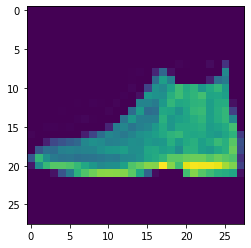

In [37]:
#checking class name of y_pred
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


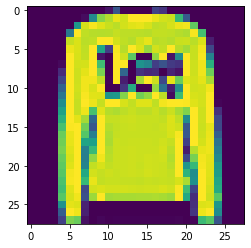

In [38]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


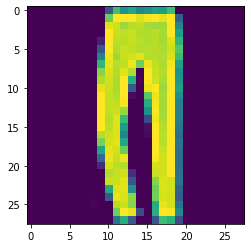

In [39]:
print(plt.imshow(X_test[2]))

# CNN Using Keras (fashion_mnist) dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pingouin as pg
from pingouin import ttest

C:\Users\Admin\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.0, the latest is 0.5.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
classnames = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankel boot"]

### Data Reshaping

##### We need 3D images for CNN model

In [6]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

### Data Normalization

##### Dividing the entrire dataset with 255, for all value lies between 0 and 1

In [7]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

### Split data into train/validation/test Dataset

In [8]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

### Create the Model Architecture

In [9]:
np.random.seed(42)
tf.random.set_seed(42)

In [10]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32,kernel_size = (3,3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))

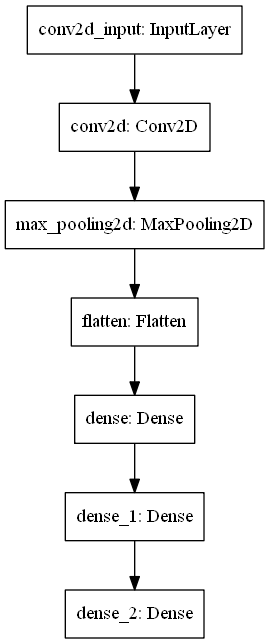

In [11]:
import pydot
keras.utils.plot_model(model)

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

### Compling Model

In [13]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [14]:
model_history =model.fit(X_train, y_train, epochs=30, batch_size = 64,
                         validation_data=(X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 11s 13ms/step - loss: 0.8768 - accuracy: 0.6990 - val_loss: 0.7497 - val_accuracy: 0.7360
Epoch 2/30
860/860 [==============================] - 12s 13ms/step - loss: 0.5388 - accuracy: 0.8048 - val_loss: 0.4953 - val_accuracy: 0.8164
Epoch 3/30
860/860 [==============================] - 11s 13ms/step - loss: 0.4807 - accuracy: 0.8261 - val_loss: 0.9059 - val_accuracy: 0.7114
Epoch 4/30
860/860 [==============================] - 11s 13ms/step - loss: 0.4436 - accuracy: 0.8411 - val_loss: 0.4141 - val_accuracy: 0.8578
Epoch 5/30
860/860 [==============================] - 12s 14ms/step - loss: 0.4194 - accuracy: 0.8499 - val_loss: 0.4365 - val_accuracy: 0.8474
Epoch 6/30
860/860 [==============================] - 11s 13ms/step - loss: 0.3956 - accuracy: 0.8583 - val_loss: 0.3776 - val_accuracy: 0.8700
Epoch 7/30
860/860 [==============================] - 11s 13ms/step - loss: 0.3780 - accuracy: 0.8663 - val_loss: 0.4055 - val_accuracy:

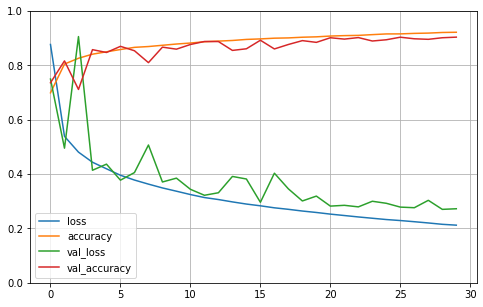

In [54]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

### As we can see with each epoch the training accuracy and the validation accuracy is increasing and loss is decreasing.
### We can also see that the model has not converged yet, the validation accuracy is still going up and validation loss is still going down.
### Therefore we should rerun our model.
### Note - Keras have the weights and biass value in memory, so if we rerun the code again it will not start training from the start, it will start training from last position only.

In [15]:
model_history =model.fit(X_train, y_train, epochs=30, batch_size = 64,
                         validation_data=(X_valid,y_valid))

Epoch 1/30
860/860 [==============================] - 10s 12ms/step - loss: 0.2072 - accuracy: 0.9240 - val_loss: 0.2816 - val_accuracy: 0.8944
Epoch 2/30
860/860 [==============================] - 11s 13ms/step - loss: 0.2031 - accuracy: 0.9266 - val_loss: 0.2583 - val_accuracy: 0.9052
Epoch 3/30
860/860 [==============================] - 11s 13ms/step - loss: 0.1998 - accuracy: 0.9273 - val_loss: 0.3880 - val_accuracy: 0.8600
Epoch 4/30
860/860 [==============================] - 11s 13ms/step - loss: 0.1957 - accuracy: 0.9280 - val_loss: 0.2740 - val_accuracy: 0.8976
Epoch 5/30
860/860 [==============================] - 11s 13ms/step - loss: 0.1937 - accuracy: 0.9289 - val_loss: 0.2518 - val_accuracy: 0.9104
Epoch 6/30
860/860 [==============================] - 12s 13ms/step - loss: 0.1882 - accuracy: 0.9317 - val_loss: 0.2484 - val_accuracy: 0.9116
Epoch 7/30
860/860 [==============================] - 12s 14ms/step - loss: 0.1848 - accuracy: 0.9328 - val_loss: 0.2786 - val_accuracy:

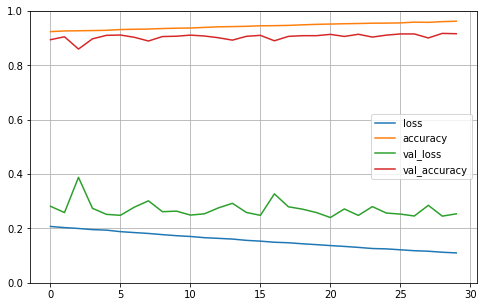

In [16]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [17]:
ev = model.evaluate(X_test_n,y_test)
ev

313/313 [==============================] - 1s 3ms/step - loss: 0.2667 - accuracy: 0.9124


[0.26674720644950867, 0.9124000072479248]

### We are getting 91% accuracy, which is preety good.

In [18]:
X_new = X_test[:3]

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1], dtype=int64)

In [20]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


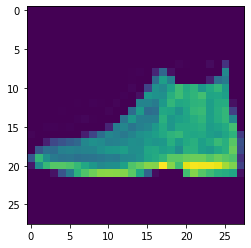

In [21]:
print(plt.imshow(X_test[0].reshape((28,28))))